In [ ]:
# prompt: unzip a datset

!unzip -q 'archive.zip'

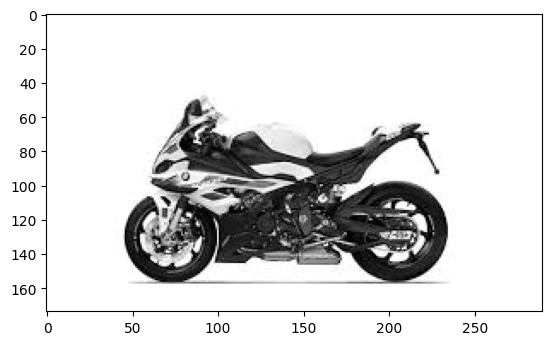

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/Car-Bike-Dataset"

CATEGORIES = ["Bike", "Car"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break

In [ ]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
print(img_array.shape)

(174, 290)


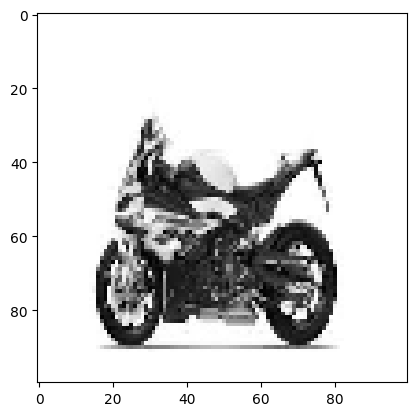

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 2000/2000 [00:02<00:00, 908.76it/s] 

4000


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
1
1
1
0
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([label for label, label in training_data])
# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 81]
   [109]
   [180]
   ...
   [251]
   [252]
   [252]]

  [[ 47]
   [ 82]
   [182]
   ...
   [250]
   [251]
   [252]]

  [[ 39]
   [ 85]
   [156]
   ...
   [249]
   [250]
   [252]]

  ...

  [[  8]
   [  8]
   [  8]
   ...
   [  8]
   [  8]
   [  8]]

  [[  8]
   [  8]
   [  8]
   ...
   [  8]
   [  8]
   [  8]]

  [[  8]
   [  8]
   [  8]
   ...
   [  8]
   [  8]
   [  8]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
X = np.array(X)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import time
X = X/255.0
NAME = "Bike-vs-Cars-CNN"
tensorboard = TensorBoard(log_dir="/content/{}".format(NAME))

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3 ,callbacks=[tensorboard])

Epoch 1/3
88/88 [==============================] - 608s 7s/step - loss: 0.5919 - accuracy: 0.7761 - val_loss: 0.2584 - val_accuracy: 0.8967
Epoch 2/3
88/88 [==============================] - 605s 7s/step - loss: 0.2349 - accuracy: 0.9064 - val_loss: 0.2267 - val_accuracy: 0.9175
Epoch 3/3
88/88 [==============================] - 603s 7s/step - loss: 0.1929 - accuracy: 0.9268 - val_loss: 0.2166 - val_accuracy: 0.9133


In [ ]:
!pip uninstall -y tensorboard tb-nightly &&
!pip install tb-nightly  # must have at least tb-nightly==2.5.0a20210316

/bin/bash: -c: line 2: syntax error: unexpected end of file
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00


In [ ]:
# prompt: open tensor board from the log file in the library

!tensorboard --logdir=/content/Bike-vs-Cars-CNN --load_fast true


2024-01-29 18:59:59.137335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 18:59:59.137436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 18:59:59.139567: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 18:59:59.162615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 19:00:02.400421: W tensorflow/compiler/tf2